# A Lake Model of Employment

## Outline

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Lake model

This model is sometimes called the **lake model** because there are two pools of workers:

1. those who are currently employed.
2. those who are currently unemployed but are seeking employment.

The "flows" between the two lakes are as follows:

1. workers exit the labor market at rate $d$.
2. new workers enter the labor market at rate $b$.
3. employed workers separate from their jobs at rate $\alpha$.
4. unemployed workers find jobs at rate $\lambda$.

The graph below illustrates the lake model.

```{figure} /_static/lecture_specific/lake_model/lake_model_worker.png
:name: lake_model_graphviz

An illustration of the lake model
```

## Dynamics

Let $e_t$ and $u_t$ be the number of employed and unemployed workers at time $t$ respectively.

The total population of workers is $n_t = e_t + u_t$.

The number of unemployed and employed workers thus evolves according to:

```{math}
:label: lake_model
\begin{aligned}
    u_{t+1} &= (1-d)(1-\lambda)u_t + \alpha(1-d)e_t + bn_t \\
    &= ((1-d)(1-\lambda) + b)u_t + (\alpha(1-d) + b)e_t \\
    e_{t+1} &= (1-d)\lambda u_t + (1 - \alpha)(1-d)e_t
\end{aligned}
```

We can arrange {eq}`lake_model` as a linear system of equations in matrix form $x_{t+1} = Ax_t$ where

$$
x_{t+1} =
\begin{bmatrix}
    u_{t+1} \\
    e_{t+1}
\end{bmatrix}
\quad
A =
\begin{bmatrix}
    (1-d)(1-\lambda) + b & \alpha(1-d) + b \\
    (1-d)\lambda & (1 - \alpha)(1-d)
\end{bmatrix}
\quad \text{and} \quad
x_t =
\begin{bmatrix}
    u_t \\
    e_t
\end{bmatrix}.
$$

Suppose at $t=0$ we have $x_0 = \begin{bmatrix} u_0 & e_0 \end{bmatrix}^\top$.

Then, $x_1=Ax_0$, $x_2=Ax_1=A^2x_0$ and thus $x_t = A^tx_0$.

Thus the long-run outcomes of this system may depend on the initial condition $x_0$ and the matrix $A$.

We are interested in how $u_t$ and $e_t$ evolve over time.

What long-run unemployment rate and employment rate should we expect?

Do long-run outcomes depend on the initial values $(u_0, e_o)$?

### Visualising the long-run outcomes

Let us first plot the time series of unemployment $u_t$, employment $e_t$, and labor force $n_t$.

In [2]:
class LakeModel:
    """
    Solves the lake model and computes dynamics of the unemployment stocks and
    rates.

    Parameters:
    ------------
    λ : scalar
        The job finding rate for currently unemployed workers
    α : scalar
        The dismissal rate for currently employed workers
    b : scalar
        Entry rate into the labor force
    d : scalar
        Exit rate from the labor force

    """
    def __init__(self, λ=0.1, α=0.013, b=0.0124, d=0.00822):
        self.λ, self.α, self.b, self.d = λ, α, b, d

        λ, α, b, d = self.λ, self.α, self.b, self.d
        self.g = b - d
        g = self.g

        self.A = np.array([[(1-d)*(1-λ) + b,   α*(1-d) + b],
                           [        (1-d)*λ,   (1-α)*(1-d)]])


        self.ū = (1 + g - (1 - d) * (1 - α)) / (1 + g - (1 - d) * (1 - α) + (1 - d) * λ)
        self.ē = 1 - self.ū


    def simulate_path(self, x0, T=1000):
        """
        Simulates the sequence of employment and unemployment

        Parameters
        ----------
        x0 : array
            Contains initial values (u0,e0)
        T : int
            Number of periods to simulate

        Returns
        ----------
        x : iterator
            Contains sequence of employment and unemployment rates

        """
        x0 = np.atleast_1d(x0)  # Recast as array just in case
        x_ts= np.zeros((2, T))
        x_ts[:, 0] = x0
        for t in range(1, T):
            x_ts[:, t] = self.A @ x_ts[:, t-1]
        return x_ts

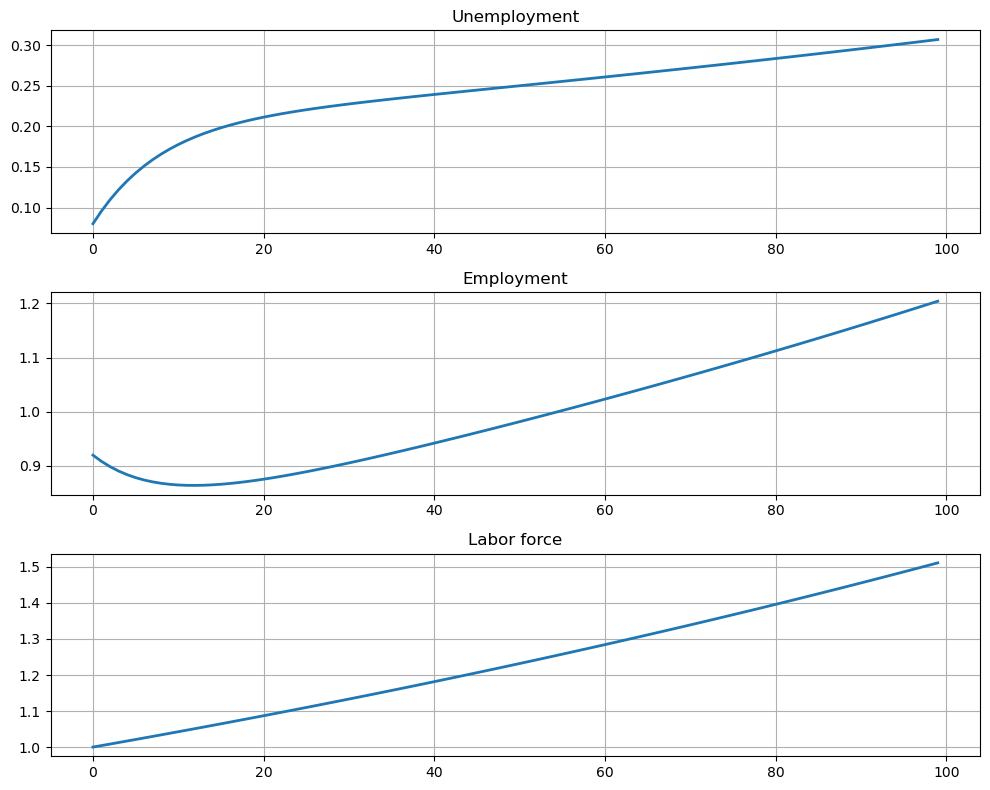

In [3]:
lm = LakeModel()
e_0 = 0.92          # Initial employment
u_0 = 1 - e_0       # Initial unemployment, given initial n_0 = 1

lm = LakeModel()
T = 100         # Simulation length

x_0 = (u_0, e_0)
x_path = lm.simulate_path(x_0, T)

fig, axes = plt.subplots(3, 1, figsize=(10, 8))


axes[0].plot(x_path[0, :], lw=2)
axes[0].set_title('Unemployment')

axes[1].plot(x_path[1, :], lw=2)
axes[1].set_title('Employment')

axes[2].plot(x_path.sum(0), lw=2)
axes[2].set_title('Labor force')

for ax in axes:
    ax.grid()

plt.tight_layout()
plt.show()

Not surprisingly, we observe that labor force $n_t$ increases at a constant rate.

This coincides with the fact there is only one inflow source (new entrants pool) to unemployment and employment pools.

The inflow and outflow of labor market system
is determined by constant exit rate and entry rate of labor market in the long run.

In detail, let $\mathbb{1}=[1, 1]^\top$ be a vector of ones.

Observe that

$$
    \begin{aligned}
    n_{t+1} &= u_{t+1} + e_{t+1} \\
    &= \mathbb{1}^\top x_{t+1} \\
    &= \mathbb{1}^\top A x_t \\
    &= (1 + b - d) (u_t + e_t) \\
    &= (1 + b - d) n_t.
    \end{aligned}
$$

Hence, the growth rate of $n_t$ is fixed at $1 + b - d$.

Moreover, the times series of unemployment and employment seems to grow at some stable rates in the long run.

### The application of Perron-Frobenius theorem

Since by intuition if we consider unemployment pool and employment pool as a closed system, the growth should be similar to the labor force.

We next ask whether the long-run growth rates of $e_t$ and $u_t$
also dominated by $1+b-d$ as labor force.

The answer will be clearer if we appeal to {ref}`Perron-Frobenius theorem<perron-frobe>`.

The importance of the Perron-Frobenius theorem stems from the fact that
firstly in the real world most matrices we encounter are nonnegative matrices.

Secondly, many important models are simply linear iterative models that
begin with an initial condition $x_0$ and then evolve recursively by the rule
$x_{t+1} = Ax_t$ or in short $x_t = A^tx_0$.

This theorem helps characterise the dominant eigenvalue $r(A)$ which
determines the behavior of this iterative process.

#### Dominant eigenvector

We now illustrate the power of the Perron-Frobenius theorem by showing how it
helps us to analyze the lake model.

Since $A$ is a nonnegative and irreducible matrix, the Perron-Frobenius theorem implies that:

- the spectral radius $r(A)$ is an eigenvalue of $A$, where

$$
    r(A) := \max\{|\lambda|: \lambda \text{ is an eigenvalue of } A \}
$$

- any other eigenvalue $\lambda$ in absolute value is strictly smaller than $r(A)$: $|\lambda|< r(A)$,

- there exist unique and everywhere positive right eigenvector $\phi$ (column vector) and left eigenvector $\psi$ (row vector):

$$
    A \phi = r(A) \phi, \quad  \psi A = r(A) \psi
$$

- if further $A$ is positive, then with $<\psi, \phi> = \psi \phi=1$ we have

$$
    r(A)^{-t} A^t \to \phi \psi
$$

The last statement implies that the magnitude of $A^t$ is identical to the magnitude of $r(A)^t$ in the long run, where $r(A)$ can be considered as the dominant eigenvalue in this lecture.

Therefore, the magnitude $x_t = A^t x_0$ is also dominated by $r(A)^t$ in the long run.

Recall that the spectral radius is bounded by column sums: for $A \geq 0$, we have

```{math}
:label: PF_bounds
\min_j \text{colsum}_j (A) \leq r(A) \leq \max_j \text{colsum}_j (A)
```

Note that $\text{colsum}_j(A) = 1 + b - d$ for $j=1,2$ and by {eq}`PF_bounds` we can thus conclude that the dominant eigenvalue
is $r(A) = 1 + b - d$.

Denote $g = b - d$ as the overall growth rate of the total labor force, so that $r(A) = 1 + g$.

The Perron-Frobenius implies that there is a unique positive eigenvector $\bar{x} = \begin{bmatrix} \bar{u} \\ \bar{e} \end{bmatrix}$
such that $A\bar{x} = r(A)\bar{x}$ and $\begin{bmatrix} 1 & 1 \end{bmatrix} \bar{x} = 1$:

```{math}
:label: steady_x

\begin{aligned}
    \bar{u} & = \frac{b + \alpha (1-d)}{b + (\alpha+\lambda)(1-d)} \\
    \bar{e} & = \frac{\lambda(1-d)}{b + (\alpha+\lambda)(1-d)}
\end{aligned}
```

Since $\bar{x}$ is the eigenvector corresponding to the dominant eigenvalue $r(A)$, we call $\bar{x}$ the dominant eigenvector.

This dominant eigenvector plays an important role in determining long-run outcomes as illustrated below.

In [4]:
def plot_time_paths(lm, x0=None, T=1000, ax=None):
        """
        Plots the simulated time series.

        Parameters
        ----------
        lm : class
            Lake Model
        x0 : array
            Contains some different initial values.
        T : int
            Number of periods to simulate

        """


        if x0 is None:
            x0 = np.array([[5.0, 0.1]])

        ū, ē = lm.ū, lm.ē

        x0 = np.atleast_2d(x0)

        if ax is None:
            fig, ax = plt.subplots(figsize=(10, 8))
            # Plot line D
            s = 10
            ax.plot([0, s * ū], [0, s * ē], "k--", lw=1, label='set $D$')

        # Set the axes through the origin
        for spine in ["left", "bottom"]:
            ax.spines[spine].set_position("zero")
        for spine in ["right", "top"]:
            ax.spines[spine].set_color("none")

        ax.set_xlim(-2, 6)
        ax.set_ylim(-2, 6)
        ax.set_xlabel("unemployed workforce")
        ax.set_ylabel("employed workforce")
        ax.set_xticks((0, 6))
        ax.set_yticks((0, 6))




        # Plot time series
        for x in x0:
            x_ts = lm.simulate_path(x0=x)

            ax.scatter(x_ts[0, :], x_ts[1, :], s=4,)

            u0, e0 = x
            ax.plot([u0], [e0], "ko", ms=2, alpha=0.6)
            ax.annotate(f'$x_0 = ({u0},{e0})$',
                        xy=(u0, e0),
                        xycoords="data",
                        xytext=(0, 20),
                        textcoords="offset points",
                        arrowprops=dict(arrowstyle = "->"))

        ax.plot([ū], [ē], "ko", ms=4, alpha=0.6)
        ax.annotate(r'$\bar{x}$',
                xy=(ū, ē),
                xycoords="data",
                xytext=(20, -20),
                textcoords="offset points",
                arrowprops=dict(arrowstyle = "->"))

        if ax is None:
            plt.show()

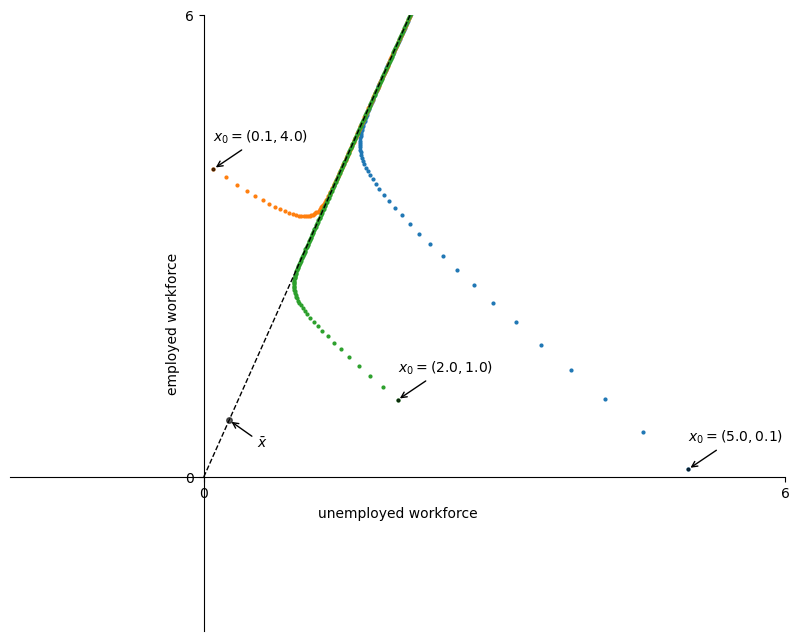

In [5]:
lm = LakeModel(α=0.01, λ=0.1, d=0.02, b=0.025)
x0 = ((5.0, 0.1), (0.1, 4.0), (2.0, 1.0))
plot_time_paths(lm, x0=x0)

Since $\bar{x}$ is an eigenvector corresponding to the eigenvalue $r(A)$, all the vectors in the set
$D := \{ x \in \mathbb{R}^2 : x = \alpha \bar{x} \; \text{for some} \; \alpha >0 \}$ are also eigenvectors corresponding
to $r(A)$.

This set $D$ is represented by a dashed line in the above figure.

The graph illustrates that for two distinct initial conditions $x_0$ the sequences of iterates $(A^t x_0)_{t \geq 0}$ move towards $D$ over time.

This suggests that all such sequences share strong similarities in the long run, determined by the dominant eigenvector $\bar{x}$.

#### Negative growth rate

In the example illustrated above we considered parameters such that overall growth rate of the labor force $g>0$.

Suppose now we are faced with a situation where the $g<0$, i.e., negative growth in the labor force.

This means that $b-d<0$, i.e., workers exit the market faster than they enter.

What would the behavior of the iterative sequence $x_{t+1} = Ax_t$ be now?

This is visualised below.

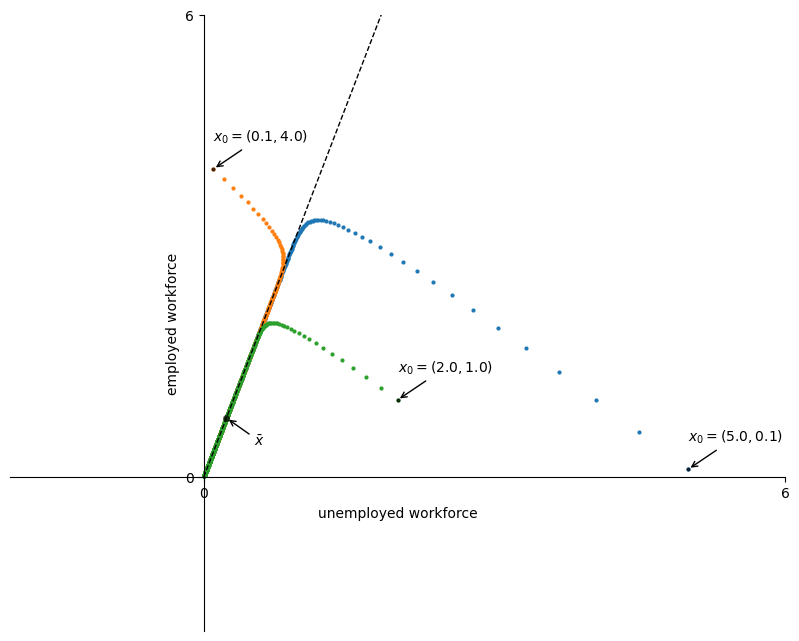

In [6]:
lm = LakeModel(α=0.01, λ=0.1, d=0.025, b=0.02)
plot_time_paths(lm, x0=x0)

Thus, while the sequence of iterates still moves towards the dominant eigenvector $\bar{x}$, in this case
they converge to the origin.

This is a result of the fact that $r(A)<1$, which ensures that the iterative sequence $(A^t x_0)_{t \geq 0}$ will converge
to some point, in this case to $(0,0)$.

This leads us to the next result.

### Properties

Since the column sums of $A$ are $r(A)=1$, the left eigenvector is $\mathbb{1}^\top=[1, 1]$.

Perron-Frobenius theory implies that

$$
r(A)^{-t} A^{t} \approx \bar{x} \mathbb{1}^\top = \begin{bmatrix} \bar{u} & \bar{u} \\ \bar{e} & \bar{e} \end{bmatrix}.
$$

As a result, for any $x_0 = (u_0, e_0)^\top$, we have

$$
\begin{aligned}
x_t = A^t x_0 &\approx r(A)^t \begin{bmatrix} \bar{u} & \bar{u} \\ \bar{e} & \bar{e} \end{bmatrix} \begin{bmatrix}u_0 \\ e_0 \end{bmatrix} \\
&= (1+g)^t(u_0 + e_0) \begin{bmatrix}\bar{u} \\ \bar{e} \end{bmatrix} \\
&= (1 + g)^t n_0 \bar{x} \\
&= n_t \bar{x}.
\end{aligned}
$$

as $t$ is large enough.

We see that the growth of $u_t$ and $e_t$ also dominated by $r(A) = 1+g$ in the long run: $x_t$ grows along $D$ as $r(A) > 1$ and converges to $(0, 0)$ as $r(A) < 1$.

Moreover, the long-run unemployment and employment are steady fractions of $n_t$.

The latter implies that $\bar{u}$ and $\bar{e}$ are long-run unemployment rate and employment rate, respectively.

In detail, we have the unemployment rates and employment rates: $x_t / n_t = A^t n_0 / n_t \to \bar{x}$ as $t \to \infty$.

To illustrate the dynamics of the rates, let $\hat{A} := A / (1+g)$ be the transition matrix of $r_t := x_t/ n_t$.

The dynamics of the rates follow

$$
r_{t+1} = \frac{x_{t+1}}{n_{t+1}} = \frac{x_{t+1}}{(1+g) n_{t}} = \frac{A x_t}{(1+g)n_t} = \hat{A} \frac{x_t}{n_t}
=\hat{A} r_t.
$$

Observe that the column sums of $\hat{A}$ are all one so that $r(\hat{A})=1$.

One can check that $\bar{x}$ is also the right eigenvector of $\hat{A}$ corresponding to $r(\hat{A})$ that $\bar{x} = \hat{A} \bar{x}$.

Moreover, $\hat{A}^t r_0 \to \bar{x}$ as $t \to \infty$ for any $r_0 = x_0 / n_0$, since the above discussion implies

$$
r_t = \hat{A}^t r_0 = (1+g)^{-t} A^t r_0 = r(A)^{-t} A^t r_0 \to \begin{bmatrix} \bar{u} & \bar{u} \\ \bar{e} & \bar{e} \end{bmatrix} r_0 = \begin{bmatrix} \bar{u} \\  \bar{e} \end{bmatrix}. 
$$

This is illustrated below.

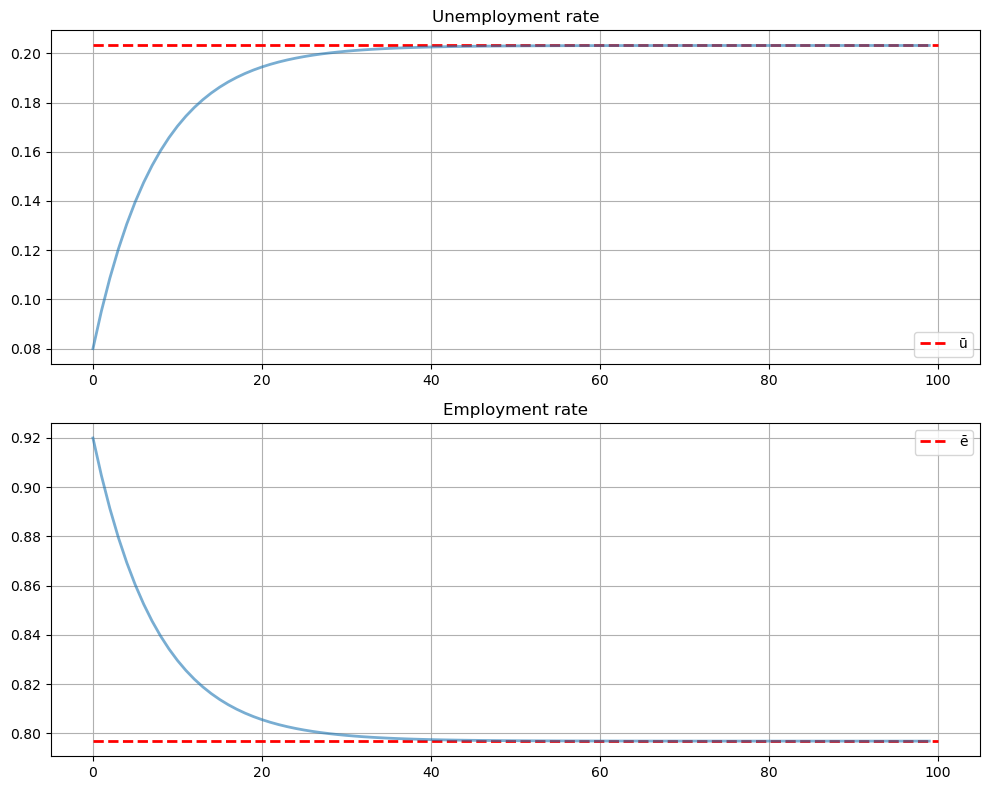

In [7]:
lm = LakeModel()
e_0 = 0.92          # Initial employment
u_0 = 1 - e_0       # Initial unemployment, given initial n_0 = 1

lm = LakeModel()
T = 100         # Simulation length

x_0 = (u_0, e_0)

x_path = lm.simulate_path(x_0, T)

rate_path = x_path / x_path.sum(0)

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot steady ū and ē
axes[0].hlines(lm.ū, 0, T, 'r', '--', lw=2, label='ū')
axes[1].hlines(lm.ē, 0, T, 'r', '--', lw=2, label='ē')

titles = ['Unemployment rate', 'Employment rate']
locations = ['lower right', 'upper right']

# Plot unemployment rate and employment rate
for i, ax in enumerate(axes):
    ax.plot(rate_path[i, :], lw=2, alpha=0.6)
    ax.set_title(titles[i])
    ax.grid()
    ax.legend(loc=locations[i])


plt.tight_layout()
plt.show()

To provide more intuition for convergence, we further explain the convergence below without the Perron-Frobenius theorem.

Suppose that $\hat{A} = P D P^{-1}$ is diagonalizable, where $P = [v_1, v_2]$ consists of eigenvectors $v_1$ and $v_2$ of $\hat{A}$
corresponding to eigenvalues $\gamma_1$ and $\gamma_2$ respectively,
and $D = \text{diag}(\gamma_1, \gamma_2)$.

Let $\gamma_1 = r(\hat{A})=1$ and $|\gamma_2| < \gamma_1$, so that the spectral radius is a dominant eigenvalue.

The dynamics of the rates follow $r_{t+1} = \hat{A} r_t$, where $r_0$ is a probability vector: $\sum_j r_{0,j}=1$.

Consider $z_t = P^{-1} r_t $.

Then, we have $z_{t+1} = P^{-1} r_{t+1} = P^{-1} \hat{A} r_t = P^{-1} \hat{A} P z_t = D z_t$.

Hence, we obtain $z_t = D^t z_0$, and for some $z_0 = (c_1, c_2)^\top$ we have

$$
r_t = P z_t = \begin{bmatrix} v_1 & v_2 \end{bmatrix}  \begin{bmatrix} \gamma_1^t & 0 \\ 0 & \gamma_2^t \end{bmatrix}
\begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = c_1 \gamma_1^t v_1 + c_2 \gamma_2^t v_2.
$$

Since $|\gamma_2| < |\gamma_1|=1$, the second term in the right hand side converges to zero.

Therefore, the convergence follows $r_t \to c_1 v_1$.

Since the column sums of $\hat{A}$ are one and $r_0$ is a probability vector, $r_t$ must be a probability vector.

In this case, $c_1 v_1$ must be a normalized eigenvector, so $c_1 v_1 = \bar{x}$ and then $r_t \to \bar{x}$.

## Exercise

```{exercise-start} Evolution of unemployment and employment rate
:label: lake_model_ex1
```

How do the long-run unemployment rate and employment rate evolve if there is an increase in the separation rate $\alpha$
or a decrease in job finding rate $\lambda$?

Is the result compatible with your intuition?

Plot the graph to illustrate how the line $D := \{ x \in \mathbb{R}^2 : x = \alpha \bar{x} \; \text{for some} \; \alpha >0 \}$
shifts in the unemployment-employment space.

```{exercise-end}
```

```{solution-start} lake_model_ex1
:class: dropdown
```

Eq. {eq}`steady_x` implies that the long-run unemployment rate will increase, and the employment rate will decrease
if $\alpha$ increases or $\lambda$ decreases.

Suppose first that $\alpha=0.01, \lambda=0.1, d=0.02, b=0.025$.
Assume that $\alpha$ increases to $0.04$.

The below graph illustrates that the line $D$ shifts clockwise downward, which indicates that
the fraction of unemployment rises as the separation rate increases.

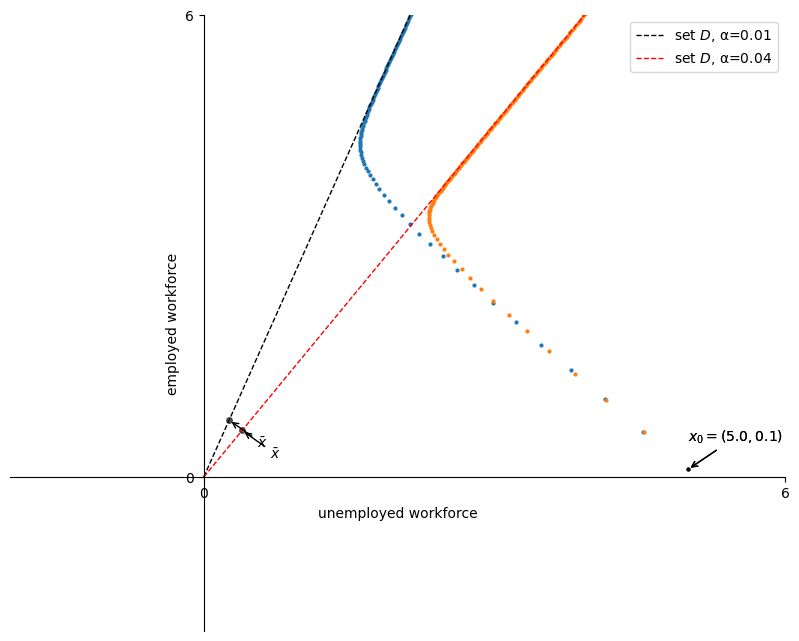

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

lm = LakeModel(α=0.01, λ=0.1, d=0.02, b=0.025)
plot_time_paths(lm, ax=ax)
s=10
ax.plot([0, s * lm.ū], [0, s * lm.ē], "k--", lw=1, label='set $D$, α=0.01')

lm = LakeModel(α=0.04, λ=0.1, d=0.02, b=0.025)
plot_time_paths(lm, ax=ax)
ax.plot([0, s * lm.ū], [0, s * lm.ē], "r--", lw=1, label='set $D$, α=0.04')

ax.legend(loc='best')
plt.show()

```{solution-end}
```